### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [59]:
#Import relevant libraries and allot an alias
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [60]:
# Read data from the .csv file on a given path
data = pd.read_csv('data/coupons.csv')

In [61]:
#Enable display of all columns and study a sample
pd.set_option("display.max_columns", None)
data.sample(5)



,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,has_children,education,occupation,income,car,Bar,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
4287,No Urgent Place,Friend(s),Sunny,55,2PM,Coffee House,1d,Male,21,Unmarried partner,0,Bachelors degree,Education&Training&Library,$12500 - $24999,NaN,1~3,4~8,4~8,4~8,never,1,0,0,0,1,1
3819,Work,Alone,Sunny,80,7AM,Carry out & Take away,2h,Male,21,Married partner,0,Some college - no degree,Education&Training&Library,$25000 - $37499,NaN,never,never,1~3,1~3,less1,1,0,0,1,0,0
6504,No Urgent Place,Kid(s),Sunny,55,2PM,Coffee House,2h,Male,36,Unmarried partner,1,Bachelors degree,Retired,$37500 - $49999,NaN,1~3,4~8,4~8,1~3,1~3,1,1,0,0,1,1
1808,Work,Alone,Sunny,55,7AM,Coffee House,2h,Male,36,Unmarried partner,1,Some college - no degree,Unemployed,$87500 - $99999,NaN,1~3,less1,4~8,1~3,less1,1,1,0,0,1,1
10469,No Urgent Place,Alone,Sunny,80,10AM,Coffee House,2h,Female,31,Unmarried partner,0,Graduate degree (Masters or Doctorate),Student,$25000 - $37499,NaN,1~3,less1,1~3,1~3,less1,1,1,0,0,1,0




**The readibility of column heads is less.The column heads require formatting.**

In [62]:
#Improve readibility of columns
data = data.rename(columns={
    'destination': 'Destination',
    'passanger': 'Passenger',
    'weather': 'Weather',
    'temperature': 'Temperature',
    'time': 'Time',
    'coupon': 'Coupon',
    'expiration': 'Expiration',
    'gender': 'Gender',
    'age': 'Age',
    'maritalStatus': 'Marital_Status',
    'has_children': 'Has_Children',
    'education': 'Education',
    'occupation': 'Occupation',
    'income': 'Income',
    'Bar': 'Bar_Frequency',
    'CoffeeHouse': 'CoffeeHouse_Frequency',
    'CarryAway': 'CarryAway_Frequency',
    'RestaurantLessThan20': 'Cheap_Restaurant',
    'Restaurant20To50': 'Expensive_Restaurant',
    'toCoupon_GEQ5min': 'Time_To_Coupon_GEQ_5min',
    'toCoupon_GEQ15min': 'Time_To_Coupon_GEQ_15min',
    'toCoupon_GEQ25min': 'Time_To_Coupon_GEQ_25min',
    'direction_same': 'Direction_Same',
    'direction_opp': 'Direction_Opposite',
    'Y': 'Coupon_Accepted'
})

In [63]:
#Study types of variables and null entries
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12684 entries, 0 to 12683
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Destination               12684 non-null  object
 1   Passenger                 12684 non-null  object
 2   Weather                   12684 non-null  object
 3   Temperature               12684 non-null  int64 
 4   Time                      12684 non-null  object
 5   Coupon                    12684 non-null  object
 6   Expiration                12684 non-null  object
 7   Gender                    12684 non-null  object
 8   Age                       12684 non-null  object
 9   Marital_Status            12684 non-null  object
 10  Has_Children              12684 non-null  int64 
 11  Education                 12684 non-null  object
 12  Occupation                12684 non-null  object
 13  Income                    12684 non-null  object
 14  car                   

**Data Info**
- All columns less "Has_Children, Temperature, Time_To_Coupon_GEQ_5min,
Time_To_Coupon_GEQ_15min, Time_To_Coupon_GEQ_25min,Direction_Same, Direction_Opposite, Coupon_Accepted" are categorical.
- We dont convert these by encoding into numerical columns.
- We work on them as such.
- Dataframe is 12684x26**

In [64]:
#Study descriptive statistics of the data
data.describe()


,Temperature,Has_Children,Time_To_Coupon_GEQ_5min,Time_To_Coupon_GEQ_15min,Time_To_Coupon_GEQ_25min,Direction_Same,Direction_Opposite,Coupon_Accepted
count,12684.000000,12684.000000,12684.0,12684.000000,12684.000000,12684.000000,12684.000000,12684.000000
mean,63.301798,0.414144,1.0,0.561495,0.119126,0.214759,0.785241,0.568433
std,19.154486,0.492593,0.0,0.496224,0.323950,0.410671,0.410671,0.495314
min,30.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,55.000000,0.000000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000
50%,80.000000,0.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
75%,80.000000,1.000000,1.0,1.000000,0.000000,0.000000,1.000000,1.000000
max,80.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000


**Description of the Data**
- Total rows - 12684
- Data is dominated by drivers with NO/One child.
- Coupon (any type of coupon) acceptance rate is approx 57%
- Time_To_Coupon_GEQ_5min has all values as "1".   

2. Investigate the dataset for missing or problematic data.

In [65]:
#Examine duplicate rows
pd.options.display.max_rows= None
data[data.duplicated(keep=False)].sort_values(by=["Age", "Income"])


,Destination,Passenger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Marital_Status,Has_Children,Education,Occupation,Income,car,Bar_Frequency,CoffeeHouse_Frequency,CarryAway_Frequency,Cheap_Restaurant,Expensive_Restaurant,Time_To_Coupon_GEQ_5min,Time_To_Coupon_GEQ_15min,Time_To_Coupon_GEQ_25min,Direction_Same,Direction_Opposite,Coupon_Accepted
4979,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,21,Single,0,Bachelors degree,Sales & Related,$100000 or More,NaN,less1,4~8,1~3,4~8,1~3,1,1,1,0,1,1
4980,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,21,Single,0,Bachelors degree,Sales & Related,$100000 or More,NaN,less1,4~8,1~3,4~8,1~3,1,1,1,0,1,1
5001,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,0,High School Graduate,Unemployed,$100000 or More,NaN,never,never,less1,never,never,1,1,1,0,1,1
5002,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,0,High School Graduate,Unemployed,$100000 or More,NaN,never,never,less1,never,never,1,1,1,0,1,1
5737,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,21,Single,0,Some college - no degree,Student,$100000 or More,NaN,less1,1~3,1~3,1~3,less1,1,1,1,0,1,1
5738,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,21,Single,0,Some college - no degree,Student,$100000 or More,NaN,less1,1~3,1~3,1~3,less1,1,1,1,0,1,1
4848,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,0,Some college - no degree,Sales & Related,$12500 - $24999,NaN,never,1~3,4~8,1~3,never,1,1,1,0,1,1
4849,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Female,21,Single,0,Some college - no degree,Sales & Related,$12500 - $24999,NaN,never,1~3,4~8,1~3,never,1,1,1,0,1,1
5057,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,21,Single,0,Bachelors degree,Computer & Mathematical,$12500 - $24999,NaN,less1,1~3,gt8,gt8,1~3,1,1,1,0,1,1
5058,Work,Alone,Sunny,80,7AM,Carry out & Take away,1d,Male,21,Single,0,Bachelors degree,Computer & Mathematical,$12500 - $24999,NaN,less1,1~3,gt8,gt8,1~3,1,1,1,0,1,1


In [66]:
#Drop Duplicate Rows in original DataFrame
data.drop_duplicates(inplace=True)

In [67]:
#Study count and positions of null values
data.isnull().sum()


,0
Destination,0
Passenger,0
Weather,0
Temperature,0
Time,0
Coupon,0
Expiration,0
Gender,0
Age,0
Marital_Status,0


In [68]:
#Find set of values of categorical variables to find any discreprancy in data.
for column in data.select_dtypes(include=["object"]).columns:
  print(f"column: {column}")
  print(data[column].unique())
  print("\n")

column: Destination
['No Urgent Place' 'Home' 'Work']


column: Passenger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


column: Weather
['Sunny' 'Rainy' 'Snowy']


column: Time
['2PM' '10AM' '6PM' '7AM' '10PM']


column: Coupon
['Restaurant(<20)' 'Coffee House' 'Carry out & Take away' 'Bar'
 'Restaurant(20-50)']


column: Expiration
['1d' '2h']


column: Gender
['Female' 'Male']


column: Age
['21' '46' '26' '31' '41' '50plus' '36' 'below21']


column: Marital_Status
['Unmarried partner' 'Single' 'Married partner' 'Divorced' 'Widowed']


column: Education
['Some college - no degree' 'Bachelors degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']


column: Occupation
['Unemployed' 'Architecture & Engineering' 'Student'
 'Education&Training&Library' 'Healthcare Support'
 'Healthcare Practitioners & Technical' 'Sales & Related' 'Management'
 'Arts Design Entertainment Sports & Media' 'Computer & Mathematical'
 'Life Physical Social

**Issues/Observations: format of categorical values**
- Values are categorical and they have an ordinal order within.  
- Data is not arranged as per order.
- Ordinal order encoding may be used. But in this project we dont use it. We work as such.
- WIthout ordinal encoding, ordering data is manual and cumbersome using order[]. We work on the given order.

In [69]:
#Find set of values of numerical variables
for column in data.select_dtypes(include=["int64"]).columns:
  print(f"column: {column}")
  print(data[column].unique())
  print("\n")

column: Temperature
[55 80 30]


column: Has_Children
[1 0]


column: Time_To_Coupon_GEQ_5min
[1]


column: Time_To_Coupon_GEQ_15min
[0 1]


column: Time_To_Coupon_GEQ_25min
[0 1]


column: Direction_Same
[0 1]


column: Direction_Opposite
[1 0]


column: Coupon_Accepted
[1 0]




**Issues/observations: numerical data**
-  Time_To_Coupon_GEQ_5min has only one value i.e. 1.
-  No of Children is either zero or 1.
-  Dataframe does not have data on drivers with more children. Deduction that NO driver in the city has more than one children seems False.  
-  Direction_Same and Direction_Opposite are redundant. One of them can be dropped to reduce the size of the Dataframe.
- But here since Dataframe is small, we keep it.

3. Decide what to do about your missing data -- drop, replace, other...

In [70]:
#Find proportion of null values in other columns
#Higher the proportion safer it is to drop the column, lower the proprotion, safer it gets to drop the resspective row/index
List_of_cols_with_nulls = ["car", "Bar_Frequency", "CoffeeHouse_Frequency","CarryAway_Frequency", "Cheap_Restaurant", "Expensive_Restaurant"]
print((data[List_of_cols_with_nulls].isnull().sum())/data.shape[0])

car                      0.991435
Bar_Frequency            0.008485
CoffeeHouse_Frequency    0.017209
CarryAway_Frequency      0.011895
Cheap_Restaurant         0.010230
Expensive_Restaurant     0.014988
dtype: float64


**_car_ column is 99 percent empty. Other columns have 1 percent null values.**

In [71]:
#Drop the car column, proportion of null in car column is 0.99.
data= data.drop("car", axis=1) #error when run again

#Check the head and shape of the dataframe after the drop.
display(data.head())
display(data.shape)


,Destination,Passenger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Marital_Status,Has_Children,Education,Occupation,Income,Bar_Frequency,CoffeeHouse_Frequency,CarryAway_Frequency,Cheap_Restaurant,Expensive_Restaurant,Time_To_Coupon_GEQ_5min,Time_To_Coupon_GEQ_15min,Time_To_Coupon_GEQ_25min,Direction_Same,Direction_Opposite,Coupon_Accepted
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,1,Some college - no degree,Unemployed,$37500 - $49999,never,never,NaN,4~8,1~3,1,1,0,0,1,0


(12610, 25)

**The _car_ column is completely dropped due to reasons given below.**  
- Nature of the values(type of the car) are such that they can not be predicted as actuals with the given dataset.
- Prediction will bring in more errors than dropping**

In [72]:
# Drop the null value rows in remaining columns having null values and re-assign
#dropna will work in this case w/o subsetting also but to make the code more generalised and safe, subsetting is used.
data=data.dropna(subset= ["Bar_Frequency", "CoffeeHouse_Frequency","CarryAway_Frequency", "Cheap_Restaurant", "Expensive_Restaurant"])

#Check the final shape and null value state of the DataFrame
display(data.shape)
data.isnull().sum()

(12007, 25)

,0
Destination,0
Passenger,0
Weather,0
Temperature,0
Time,0
Coupon,0
Expiration,0
Gender,0
Age,0
Marital_Status,0


**Again, it is efficient and less harmful to drop small number of rows with null values than predicting by any method.**

In [73]:
#Check the unique values of the categorical variables again to see the final unique values
for column in data.select_dtypes(include=["object"]).columns:
  print(f"column: {column}")
  print(data[column].unique())
  print("\n")

column: Destination
['No Urgent Place' 'Home' 'Work']


column: Passenger
['Alone' 'Friend(s)' 'Kid(s)' 'Partner']


column: Weather
['Sunny' 'Rainy' 'Snowy']


column: Time
['2PM' '10AM' '6PM' '7AM' '10PM']


column: Coupon
['Restaurant(<20)' 'Coffee House' 'Bar' 'Carry out & Take away'
 'Restaurant(20-50)']


column: Expiration
['1d' '2h']


column: Gender
['Male' 'Female']


column: Age
['21' '46' '26' '31' '41' '50plus' '36' 'below21']


column: Marital_Status
['Single' 'Married partner' 'Unmarried partner' 'Divorced' 'Widowed']


column: Education
['Bachelors degree' 'Some college - no degree' 'Associates degree'
 'High School Graduate' 'Graduate degree (Masters or Doctorate)'
 'Some High School']


column: Occupation
['Architecture & Engineering' 'Student' 'Education&Training&Library'
 'Unemployed' 'Healthcare Support' 'Healthcare Practitioners & Technical'
 'Sales & Related' 'Management' 'Arts Design Entertainment Sports & Media'
 'Computer & Mathematical' 'Life Physical Social 

4. What proportion of the total observations chose to accept the coupon?



In [74]:
#Proportion of total observations that chose to accept the coupon is simply the mean since count of 1's/total values = mean of column
print(f'Acceptance rate of a Coupon= {data["Coupon_Accepted"].mean()}')

Acceptance rate of a Coupon= 0.5684184225868244


**Acceptance rate of the coupon(any type) is 57%, which is not good enough.
The rate needs improvement.**
**We use the following methodology.**
- We study each coupon type.
- We focus more on the type which has less acceptance to improve the overall acceptance.
- Alternative approach to improve the coupons already having higher acceptance is not used in this project.

5. Use a bar plot to visualize the `coupon` column.

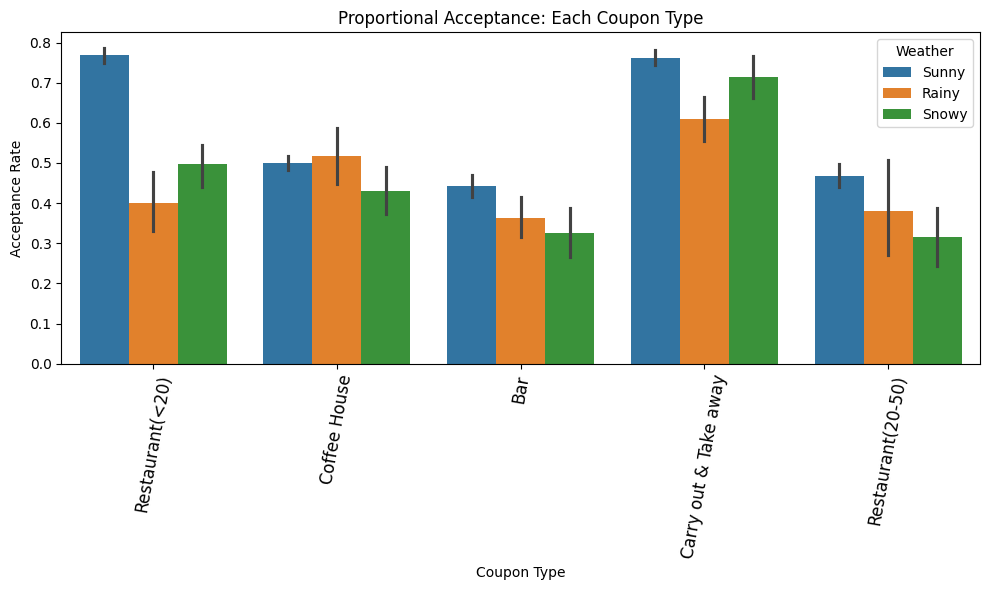

In [75]:
# Study acceptance rate of each coupon
plt.figure(figsize=(10, 6))
sns.barplot(x="Coupon", y='Coupon_Accepted', data=data, hue='Weather')
plt.xticks(rotation=80, fontsize=12)
plt.title('Proportional Acceptance: Each Coupon Type')
plt.xlabel("Coupon Type")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.savefig('images/Proportional_Acceptance_Coupon_Type.png')
plt.show()





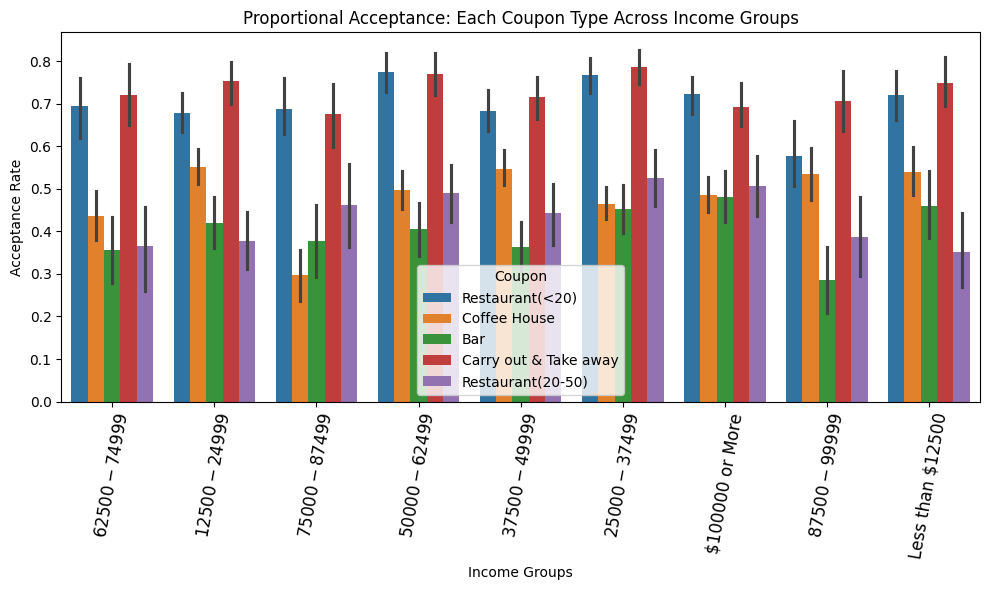

In [76]:
# Study acceptance rate of each coupon across income groups
plt.figure(figsize=(10, 6))
sns.barplot(x="Income", y='Coupon_Accepted', data=data, hue='Coupon')
plt.xticks(rotation=80, fontsize=12)
plt.title('Proportional Acceptance: Each Coupon Type Across Income Groups')
plt.xlabel("Income Groups")
plt.ylabel("Acceptance Rate")
plt.tight_layout()
plt.savefig('images/Proportional_Acceptance_Coupon_Type_Income_Groups.png')
plt.show()

**Coupon Type Analysis**
- It is evident from the plot that cheap restaurant and carry out/takeaway coupons are more likely to be accepted.

- Also, it shows, that the bar, coffee house and expensive restaurant coupons are the ones where we need to focus more to improve the overall acceptance rate.

6. Use a histogram to visualize the temperature column.

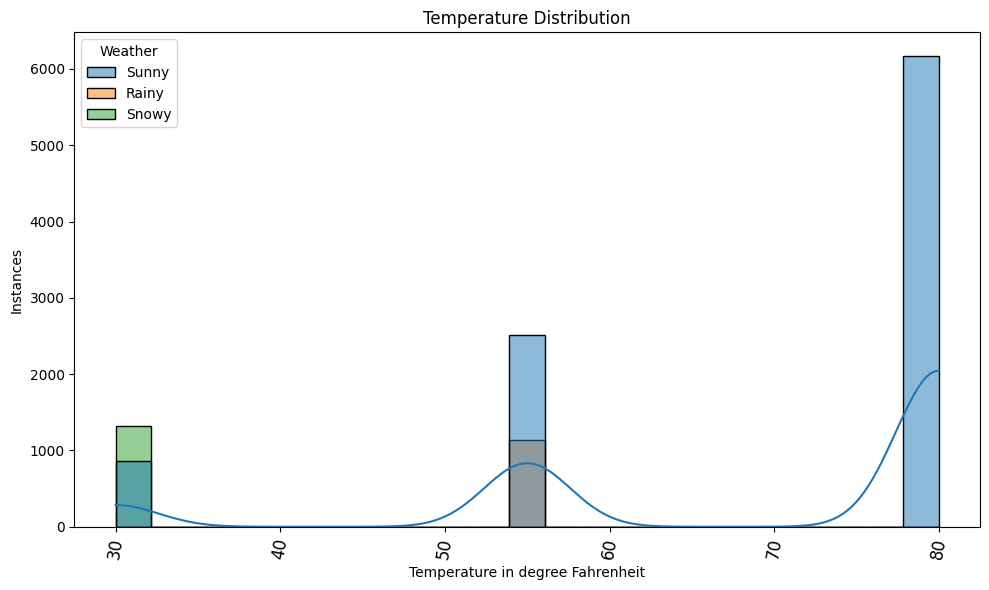

In [77]:
#Study the distribution of temperature
plt.figure(figsize=(10, 6))
sns.histplot(data=data,x="Temperature", kde=True, hue="Weather")
plt.xticks(rotation=80, fontsize=12)
plt.title('Temperature Distribution')
plt.xlabel("Temperature in degree Fahrenheit")
plt.ylabel("Instances")
plt.tight_layout()
plt.savefig('images/Temperature_Distribution.png')
plt.show()


**On average, the temperature seems to be more liekly to be high and weather sunny and warm during the data collection period.**

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [78]:
#Create Dataframe, subset of original DataFrame that containing just the bar coupons & check a sample
bar_coupons_only = data[data["Coupon"]=="Bar"]
bar_coupons_only.sample()

,Destination,Passenger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Marital_Status,Has_Children,Education,Occupation,Income,Bar_Frequency,CoffeeHouse_Frequency,CarryAway_Frequency,Cheap_Restaurant,Expensive_Restaurant,Time_To_Coupon_GEQ_5min,Time_To_Coupon_GEQ_15min,Time_To_Coupon_GEQ_25min,Direction_Same,Direction_Opposite,Coupon_Accepted
5645,Home,Alone,Sunny,80,10PM,Bar,1d,Female,36,Single,1,Graduate degree (Masters or Doctorate),Education&Training&Library,$25000 - $37499,less1,4~8,4~8,1~3,less1,1,1,0,1,0,1


2. What proportion of bar coupons were accepted?


In [79]:
# Proportion of bar coupons that were accepted using mean concept as before
print(f"Porportion of Bar Coupons Accepted = {bar_coupons_only['Coupon_Accepted'].mean()}")

Porportion of Bar Coupons Accepted = 0.4118572927597062


**Acceptance rate of bar coupons is lowest of all types of coupons i.e. 41%**

3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [80]:
#Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.
Low_Frequency_Bar_Goers_Acceptance = bar_coupons_only[bar_coupons_only['Bar_Frequency'].isin(['1~3','less1','never'])]['Coupon_Accepted'].mean()
print(f"The acceptance rate between those who went to a bar 3 or fewer times a month= {Low_Frequency_Bar_Goers_Acceptance}")

High_Frequency_Bar_Goers_Acceptance =  bar_coupons_only[bar_coupons_only["Bar_Frequency"].isin(["gtd8","4~8"])]["Coupon_Accepted"].mean()
print(f'The acceptance rate between those who went to a bar 4 or more times a month= {High_Frequency_Bar_Goers_Acceptance}')


#Other options
#display(data[(data["Bar"]=="gtd8")| (data["Bar"]=="4~8") | (data["coupon"]=="Bar")]["Y"].mean())

#display(data[(data["Bar"]=="unknown") | (data["coupon"]=="Bar")]["Y"].mean())

#display(data[(data["Bar"]=="gtd8") | (data["coupon"]=="Bar")]["Y"].mean())

The acceptance rate between those who went to a bar 3 or fewer times a month= 0.37244600116754234
The acceptance rate between those who went to a bar 4 or more times a month= 0.7755102040816326


**Higher the frequency of the bar visits of driver, higher the chances of the driver to accept the bar coupon.**

4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [81]:
#Compare the acceptance rate between drivers who go to a bar more than once a month
  #and are over the age of 25 to the all others.

Acceptance_Bar_Goers_25Over_Once_month= (bar_coupons_only[(bar_coupons_only["Bar_Frequency"].isin(["1~3","4~8", "gtd8"]))
 &(bar_coupons_only["Age"].isin(['46', '26' '31', '41', '50plus', '36']))]["Coupon_Accepted"].mean())

print(f"The acceptance rate between drivers who go to a bar more than once a month= {Acceptance_Bar_Goers_25Over_Once_month}")


Acceptance_Bar_Goers_Others = (bar_coupons_only[(bar_coupons_only["Bar_Frequency"].isin(["never","less1"]))
 &(bar_coupons_only["Age"].isin(['21', 'below21']))]["Coupon_Accepted"].mean())

print(f"The acceptance rate of all other drivers= {Acceptance_Bar_Goers_Others}")

The acceptance rate between drivers who go to a bar more than once a month= 0.6216216216216216
The acceptance rate of all other drivers= 0.3883495145631068


**Those who go to the bar more than once a month with age 25 or more are more likely to accept bar coupons than those with age less than 25 and goes to the bar once or never in a month.**

5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [82]:
#compare the acceptance rate between drivers who go to bars more than once a month and had passengers
  #that were not a kid and had occupations other than farming, fishing, or forestry.

list_occu = ['Unemployed', 'Architecture & Engineering','Student',      #Create list of occupations minus (Farming, Fishing or Forestry) category
 'Education&Training&Library', 'Healthcare Support',
 'Healthcare Practitioners & Technical', 'Sales & Related', 'Management',
 'Arts Design Entertainment Sports & Media', 'Computer & Mathematical',
 'Life Physical Social Science', 'Personal Care & Service',
 'Community & Social Services', 'Office & Administrative Support',
 'Construction & Extraction', 'Legal', 'Retired',
 'Installation Maintenance & Repair', 'Transportation & Material Moving',
 'Business & Financial', 'Protective Service',
 'Food Preparation & Serving Related', 'Production Occupations',
'Building & Grounds Cleaning & Maintenance']

Acceptance_More_Once_Month_NotKid_occu_NotFFF = (bar_coupons_only[(bar_coupons_only["Bar_Frequency"].isin(['1~3','gt8','4~8']))
& (bar_coupons_only["Passenger"].isin (['Alone', 'Friend(s)', 'Partner']))
& (bar_coupons_only["Occupation"].isin(list_occu))]["Coupon_Accepted"].mean())

print(f"Acceptance Rate visit bar more than once a month, not with a kid, occupations other than farming/fishing/forestry= {Acceptance_More_Once_Month_NotKid_occu_NotFFF}")

Acceptance_others = (bar_coupons_only[(bar_coupons_only["Bar_Frequency"].isin(["less1", "never"]))
& (bar_coupons_only["Passenger"]=='Kid(s)')
& (bar_coupons_only["Occupation"]=="Farming Fishing & Forestry") ]["Coupon_Accepted"].mean())

print(f"Acceptance Rate of Others= {Acceptance_others}")


Acceptance Rate visit bar more than once a month, not with a kid, occupations other than farming/fishing/forestry= 0.7094339622641509
Acceptance Rate of Others= 0.3333333333333333


**Those who goes to the bar more than once in a month, not in Farming/Fishing & Forestry occupation and without kids tend to accept bar coupons readily.**

6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [83]:
#Compare the acceptance rates between those drivers who:


#go to bars more than once a month, had passengers that were not a kid, and were not widowed

Acceptance_once_NotKid_Not_Widowed= (bar_coupons_only[(bar_coupons_only["Bar_Frequency"].isin(['1~3','gt8', '4~8']))
 & (bar_coupons_only["Passenger"].isin (['Alone', 'Friend(s)', 'Partner']))
 & (bar_coupons_only["Marital_Status"].isin (['Unmarried partner', 'Single', 'Married partner', 'Divorced']))]["Coupon_Accepted"].mean())

print(f"Acceptance of those who go to bars more than once a month, had passengers that were not a kid, and were not widowed= {Acceptance_once_NotKid_Not_Widowed}")



#go to bars more than once a month and are under the age of 30
Acceptance_bar_moreOnce_under30= (bar_coupons_only[(bar_coupons_only["Bar_Frequency"].isin(['1~3','gt8', '4~8']))
 &(bar_coupons_only["Age"].isin (['21','26', 'below21']))]["Coupon_Accepted"].mean())

print(f"Acceptance of  those who go to bars more than once a month and are under the age of 30= {Acceptance_bar_moreOnce_under30}")



#go to cheap restaurants more than 4 times a month and income is less than 50K
Acceptance_Cheap_MoreThan4Vists_IncomeLess50k= (bar_coupons_only[(bar_coupons_only["Cheap_Restaurant"].isin(['gt8', '4~8']))
 &(bar_coupons_only["Income"].isin (['$37500 - $49999' ,'$12500 - $24999',  '$25000 - $37499',  'Less than $12500']))]["Coupon_Accepted"].mean())

print(f"Acceptance of those who go to cheap restaurants more than 4 times a month and income is less than 50K= {Acceptance_Cheap_MoreThan4Vists_IncomeLess50k}")

Acceptance of those who go to bars more than once a month, had passengers that were not a kid, and were not widowed= 0.7094339622641509
Acceptance of  those who go to bars more than once a month and are under the age of 30= 0.7195121951219512
Acceptance of those who go to cheap restaurants more than 4 times a month and income is less than 50K= 0.45645645645645644


- **Drivers who are not widower, had a passenger who is not a kid and goes to the bar more than once in a month tend to accept coupons.**
- **Young drivers with higehr bar visit frequency tend to accept coupon more likely**
- **Drivers going to cheap restauants and income less than 50k are less likley to accept Bar Coupons.**


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

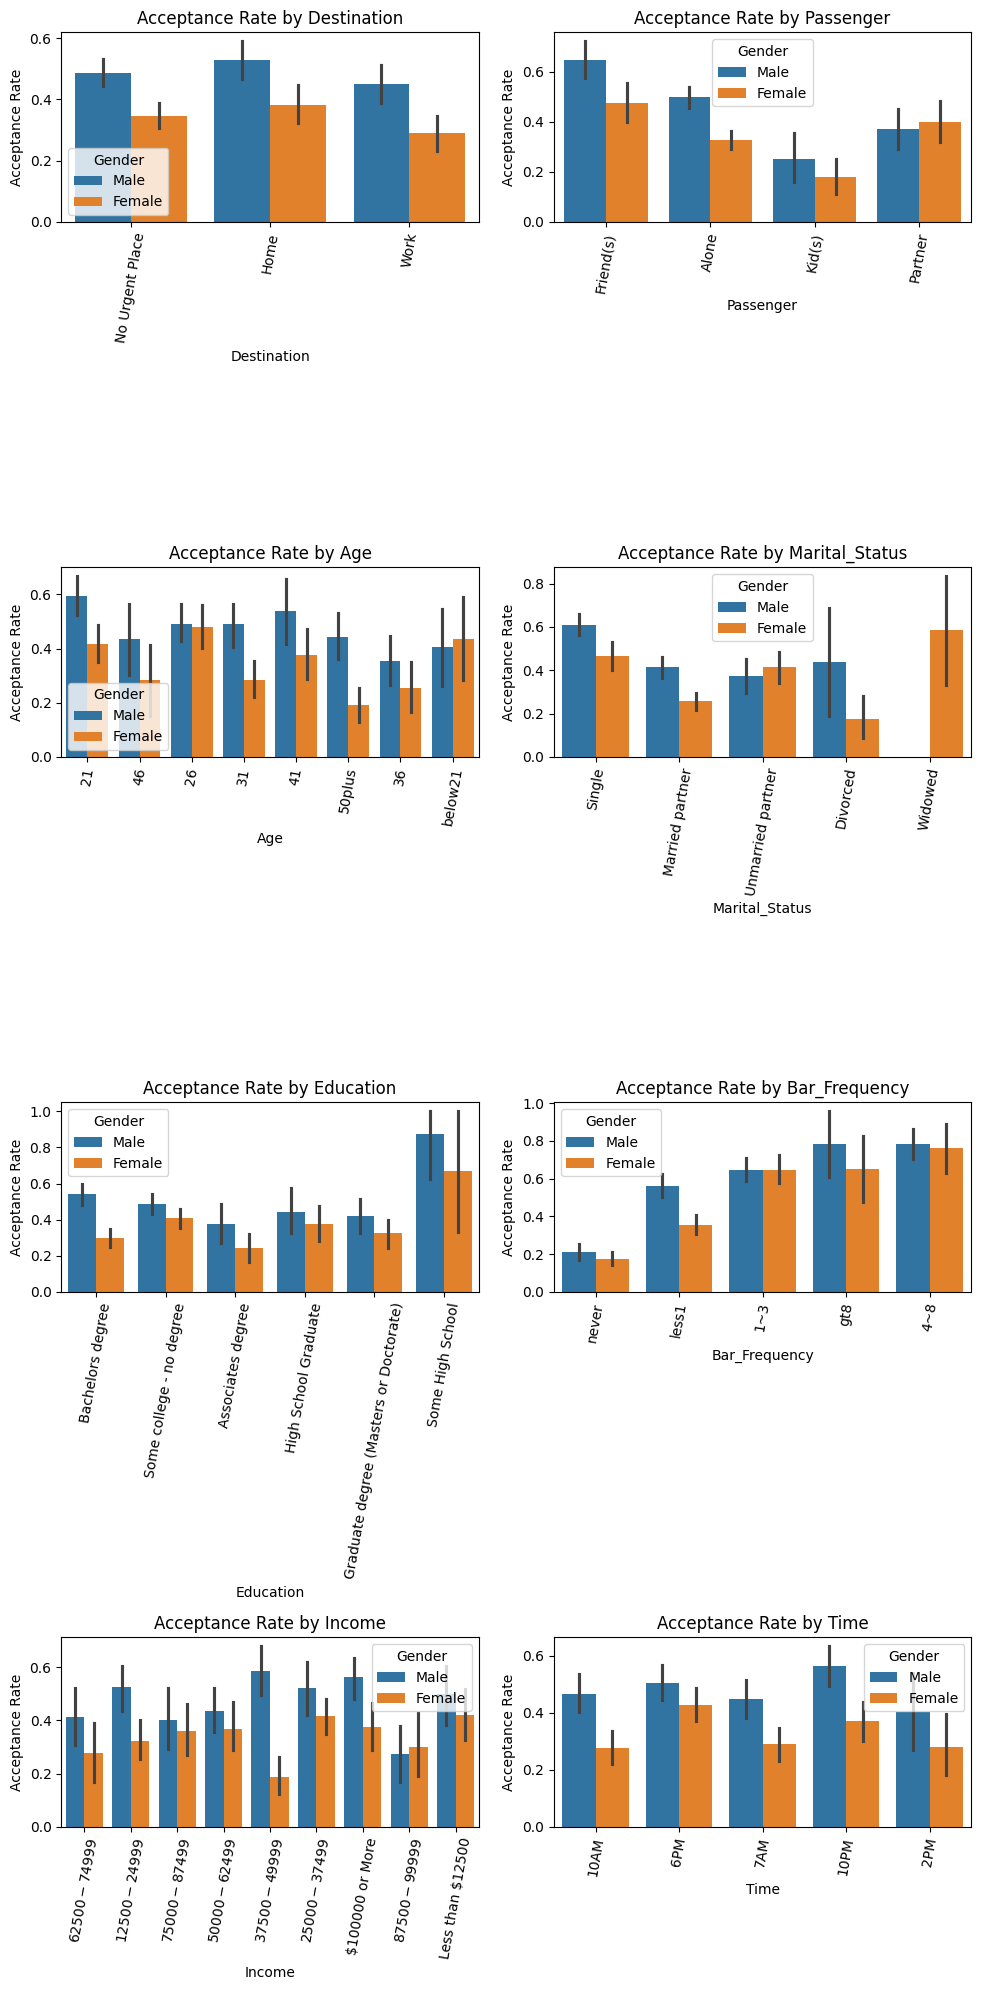

In [84]:
# Select columns
categorical_cols_driver_attributes = ['Destination', 'Passenger', 'Age', 'Marital_Status', 'Education', 'Bar_Frequency', 'Income', 'Time']


# Create a figure and subplots for two plots in each row
fig, axes = plt.subplots(4, 2, figsize=(10, 20))  # 4 rows, 2 columns


# Plot the categorical columns
for i, col in enumerate(categorical_cols_driver_attributes[:8]):  # Plot the eight categorical columns
    row = i // 2  # Calculate the row index
    col_num = i % 2  # Calculate the column index
    sns.barplot(ax=axes[row, col_num], data=bar_coupons_only, x=col, y='Coupon_Accepted', hue='Gender')  # Bar plot for each categorical column
    axes[row, col_num].set_title(f'Acceptance Rate by {col}')    #Title formatting not carried. can be further improved
    axes[row, col_num].set_xlabel(col)
    axes[row, col_num].set_ylabel('Acceptance Rate')
    axes[row, col_num].tick_params(axis='x', rotation=80)

plt.subplots_adjust(hspace=2.0)  # Give space for the x axis labels to be written. Some labels are long and ugly
plt.tight_layout()  #prevent overlapping
plt.savefig('images/Acceptance_Rates_Bar_over_Driver_Attributes.png')
plt.show()

# **Following are more likely to accept bar coupons:-**
- Drivers driving hoome/no urgent place
- Drivers with their friends
- Younger drivers : Age 21-25
- Single male and widowed females
- Drivers with less education : Some High School
- Drivers who often go to bars : visit frequency more than 4.
- Drivers driving around at night : 10 PM
- Male Drivers across all categories.  

# **Income seems to have NO linear effect on acceptance rate of bar coupons.**
# **Drivers with kid(s) are less likely to accept bar coupons.**


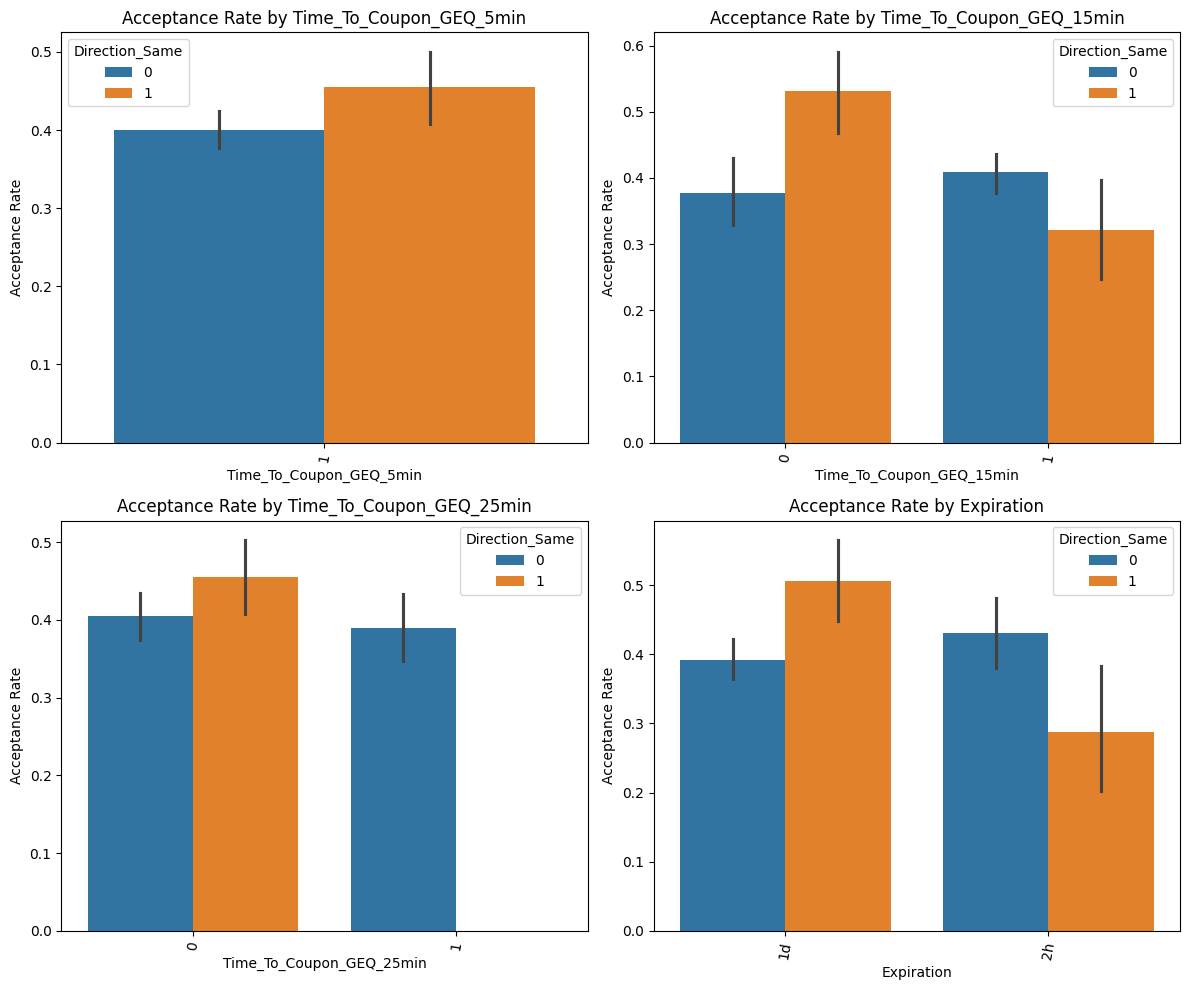

In [85]:
# Select columns
categorical_cols_coupon_attributes = ['Time_To_Coupon_GEQ_5min','Time_To_Coupon_GEQ_15min','Time_To_Coupon_GEQ_25min', 'Expiration'] #Direction_opposite is redundant


# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns


# Plot the categorical columns
for i, col in enumerate(categorical_cols_coupon_attributes[:4]):  # Plot the four categorical columns
    row = i // 2  # Calculate the row index
    col_num = i % 2  # Calculate the column index
    sns.barplot(ax=axes[row, col_num], data=bar_coupons_only, x=col, y='Coupon_Accepted', hue='Direction_Same')   # Bar plot for each categorical column
    axes[row, col_num].set_title(f'Acceptance Rate by {col}')    #Title of each sub plot
    axes[row, col_num].set_xlabel(col)
    axes[row, col_num].set_ylabel('Acceptance Rate')
    axes[row, col_num].tick_params(axis='x', rotation=80)

plt.subplots_adjust(hspace=2.0)  # Give space for the x axis labels to be written. Some labels are long and ugly
plt.tight_layout()  #prevent overlapping
plt.savefig('images/Acceptance_Rates_Bar_over_Coupon_Attributes.png')
plt.show()

#**Following is the impact of the distance, direction and lifetime of the coupon on driver's coupon acceptance behaviour.**
- All coupons are _5 mins_ away from the driver as seen by the value only 1 for 'Time_To_Coupon_GEQ_5min' in the plot and mean value 1 with zero std deviation.
- When direction of the coupon venue and the driver's driving direction are in same direction, coupons are more likely to be accepted.
- In second plot, when the direction is same and distnace is less than _15min_ then coupons are more likely to be accepted.
- In third plot, the value drops when the detour addition is more than _25 min_ and in opposite direction.
- Longer life of coupon raises the chance of acceptance of the coupon.  

In [86]:
# Find proportions based on combinations of two columns- gender and destination and groups within
acceptance_by_gender_destination = bar_coupons_only.groupby(['Gender', 'Destination'])['Coupon_Accepted'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(acceptance_by_gender_destination.sort_values(by="Coupon_Accepted", ascending=False))

   Gender      Destination  Coupon_Accepted
3    Male             Home         0.528384
4    Male  No Urgent Place         0.485961
5    Male             Work         0.448889
0  Female             Home         0.382470
1  Female  No Urgent Place         0.345309
2  Female             Work         0.291139


In [87]:
# Find proportions based on combinations of two columns- passenger and gender and groups within
acceptance_by_gender_passenger = bar_coupons_only.groupby(['Passenger', 'Gender'])['Coupon_Accepted'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(acceptance_by_gender_passenger.sort_values(by="Coupon_Accepted", ascending=False))

   Passenger  Gender  Coupon_Accepted
3  Friend(s)    Male         0.648485
1      Alone    Male         0.498188
2  Friend(s)  Female         0.476821
6    Partner  Female         0.400000
7    Partner    Male         0.370968
0      Alone  Female         0.325383
5     Kid(s)    Male         0.250000
4     Kid(s)  Female         0.181034


In [88]:
# Find proportions based on combinations of two columns- gender and marital status and groups within
acceptance_by_gender_Marital_Status = bar_coupons_only.groupby(['Gender', 'Marital_Status'])['Coupon_Accepted'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(acceptance_by_gender_Marital_Status.sort_values(by="Coupon_Accepted", ascending=False))

   Gender     Marital_Status  Coupon_Accepted
7    Male             Single         0.610390
4  Female            Widowed         0.583333
2  Female             Single         0.466403
5    Male           Divorced         0.437500
3  Female  Unmarried partner         0.415842
6    Male    Married partner         0.412742
8    Male  Unmarried partner         0.373333
1  Female    Married partner         0.255914
0  Female           Divorced         0.175439
9    Male            Widowed         0.000000


In [89]:
# Find proportions based on combinations of three columns- gender, marital status and age and groups within
acceptance_by_gender_maritalStatus_age = bar_coupons_only.groupby(['Gender', 'Marital_Status', 'Age'])['Coupon_Accepted'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(acceptance_by_gender_maritalStatus_age.sort_values(by="Coupon_Accepted", ascending=False))

    Gender     Marital_Status      Age  Coupon_Accepted
30    Male           Divorced   50plus         1.000000
44    Male             Single   50plus         0.900000
42    Male             Single       41         0.800000
13  Female             Single       26         0.716981
48    Male  Unmarried partner       31         0.666667
16  Female             Single       41         0.666667
38    Male             Single       21         0.647482
12  Female             Single       21         0.615385
39    Male             Single       26         0.592593
28  Female            Widowed   50plus         0.583333
19  Female             Single  below21         0.562500
41    Male             Single       36         0.545455
40    Male             Single       31         0.534884
45    Male             Single  below21         0.531250
35    Male    Married partner       41         0.525000
43    Male             Single       46         0.500000
46    Male  Unmarried partner       21         0

In [90]:
# Find proportions based on age group only
acceptance_by_age = bar_coupons_only.groupby(['Age'])['Coupon_Accepted'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(acceptance_by_age.sort_values(by="Coupon_Accepted", ascending=False))

       Age  Coupon_Accepted
0       21         0.503778
1       26         0.486413
4       41         0.438596
7  below21         0.419753
2       31         0.376947
5       46         0.363636
3       36         0.306122
6   50plus         0.293040


#**Hypothesis on Bar Coupons**
- Overall, bar coupons tend to be accepted lower than coupons for cheap restaurants and carryaway/takeout coupons.

- Gender : Bar coupons tend to be used by males more than females.
- Age : Younger drivers in age bracket 21-36 tend to accept the bar coupons more than older ones.
- Marital Status : Drivers in "Single/Divorced 41/50 plus men and widowed, 50 plus women" tend to accept bar coupons more than the others. Single below 21 women tend to accept rarely.
- Destination: Drivers tend to accept bar coupons more when they are heading home.
- Education: Drivers who are high school or equivalent tend to accept bar coupons more than the others irrespective of the gender.
- Passenger: Drivers tend to accept bar coupons when the passenger is a friend and tend to accept less when it is is a kid.
- Time: Drivers tend to accept bar coupons more at time around 2 PM and 10 PM.
- Visit Frequency. Bar coupons acceptance seems to have posiitve correaltion with frequency of bar visits by a driver.
- Distance & direction. Lesser the distance to the venue of the coupon and direction of the venue same as the destination of the driver tend to make the driver more likely to accept the coupon.
- Coupon life. Coupons with longer life tend to be accepted more likely than the ones with shorter life.










### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

In [91]:
#Create Dataframe, subset of original DataFrame that containing just the coffee coupons & check a sample
coffee_coupons_only = data[data["Coupon"]=="Coffee House"]
coffee_coupons_only.sample()

,Destination,Passenger,Weather,Temperature,Time,Coupon,Expiration,Gender,Age,Marital_Status,Has_Children,Education,Occupation,Income,Bar_Frequency,CoffeeHouse_Frequency,CarryAway_Frequency,Cheap_Restaurant,Expensive_Restaurant,Time_To_Coupon_GEQ_5min,Time_To_Coupon_GEQ_15min,Time_To_Coupon_GEQ_25min,Direction_Same,Direction_Opposite,Coupon_Accepted
3735,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,26,Unmarried partner,0,Some college - no degree,Food Preparation & Serving Related,$25000 - $37499,less1,less1,1~3,less1,1~3,1,0,0,0,1,1


In [92]:
# Proportion of coffe house coupons that were accepted using mean concept as before
print(f"Proportion of Coffee House Coupons Accepted= {coffee_coupons_only['Coupon_Accepted'].mean()}")

Proportion of Coffee House Coupons Accepted= 0.495668154371226


#**Approx 50 percent coupons for Coffee House are accepted.**

In [93]:
#Compare the acceptance rate between those who went to a coffee house 3 or fewer times a month to those who went more.

Acceptance_CoffeeHouse_fewerOrEqual3= (coffee_coupons_only[coffee_coupons_only["CoffeeHouse_Frequency"].isin(["1~3","less1",'never'])]["Coupon_Accepted"].mean())
print(f"Acceptance rate of those who went to a coffee house 3 or fewer times a month= {Acceptance_CoffeeHouse_fewerOrEqual3}")

Acceptance_more= (coffee_coupons_only[coffee_coupons_only["CoffeeHouse_Frequency"].isin(["gtd8","4~8"])]["Coupon_Accepted"].mean())
print(f"Acceptance of those who went more than 3 timnes= {Acceptance_more}")

Acceptance rate of those who went to a coffee house 3 or fewer times a month= 0.4449324324324324
Acceptance of those who went more than 3 timnes= 0.6824457593688363


#**Drivers having more frequency of visits to coffee house are more likely to accept the coffee house coupons.**

In [94]:
#Compare the acceptance rate between drivers who go to a coffee house more than once a month and are over the age of 25 to the all others.
Acceptance_MoreOnce_Over25= (coffee_coupons_only[(coffee_coupons_only["CoffeeHouse_Frequency"].isin(["1~3","4~8", "gtd8"]))
& (coffee_coupons_only["Age"].isin(['46' '31', '41', '25', '50plus', '36']))]["Coupon_Accepted"].mean())

print(f"Acceptance of those who go to a coffee house more than once a month and are over the age of 25= {Acceptance_MoreOnce_Over25}")

Acceptance_others= (coffee_coupons_only[(coffee_coupons_only["CoffeeHouse_Frequency"].isin(["never","less1"]))
& (coffee_coupons_only["Age"].isin(['21', 'below21']))]["Coupon_Accepted"].mean())
print(f"Acceptance of Others= {Acceptance_others}")

Acceptance of those who go to a coffee house more than once a month and are over the age of 25= 0.6175824175824176
Acceptance of Others= 0.3485838779956427


#**Drivers with age more than 25 and visting coffee houses frequently have higher acceptance rate.**

In [95]:
#compare the acceptance rate between drivers who go to coffeehouse more than once a month and had passengers
  #that were not a kid and had occupations other than farming, fishing, or forestry.

list_occu = ['Farming Fishing & Forestry', 'Architecture & Engineering','Student',      #Create list of occupations (minus unemployed) category
 'Education&Training&Library', 'Healthcare Support',
 'Healthcare Practitioners & Technical', 'Sales & Related', 'Management',
 'Arts Design Entertainment Sports & Media', 'Computer & Mathematical',
 'Life Physical Social Science', 'Personal Care & Service',
 'Community & Social Services', 'Office & Administrative Support',
 'Construction & Extraction', 'Legal', 'Retired',
 'Installation Maintenance & Repair', 'Transportation & Material Moving',
 'Business & Financial', 'Protective Service',
 'Food Preparation & Serving Related', 'Production Occupations',
'Building & Grounds Cleaning & Maintenance']

Acceptance_MoreOnce_NotKId_NotUnemp= (coffee_coupons_only[(coffee_coupons_only["CoffeeHouse_Frequency"].isin(['1~3','gt8','4~8']))
 &(coffee_coupons_only["Passenger"].isin (['Alone', 'Friend(s)', 'Partner']))
 &(coffee_coupons_only["Occupation"].isin(list_occu))]["Coupon_Accepted"].mean())

print(f"Acceptance_Bars_MoreThanOnce_Not_With_kid_Occupations_Other_than_Unemp= {Acceptance_MoreOnce_NotKId_NotUnemp}")


Acceptance__Others= (coffee_coupons_only[(coffee_coupons_only["CoffeeHouse_Frequency"].isin(["less1", "never"]))
 &(coffee_coupons_only["Passenger"]=='Kid(s)')
 &(coffee_coupons_only["Occupation"]=="Unemployed") ]["Coupon_Accepted"].mean())

print(f"Acceptance of Others= {Acceptance__Others}")


Acceptance_Bars_MoreThanOnce_Not_With_kid_Occupations_Other_than_Unemp= 0.6496062992125984
Acceptance of Others= 0.16666666666666666


**Occupation less unemployed category seems to have no impact on coffehouse coupn acceptance. Unemployed drivers with kids and coffee house frequency less than once a month are least likely to accept coffee house coupons**

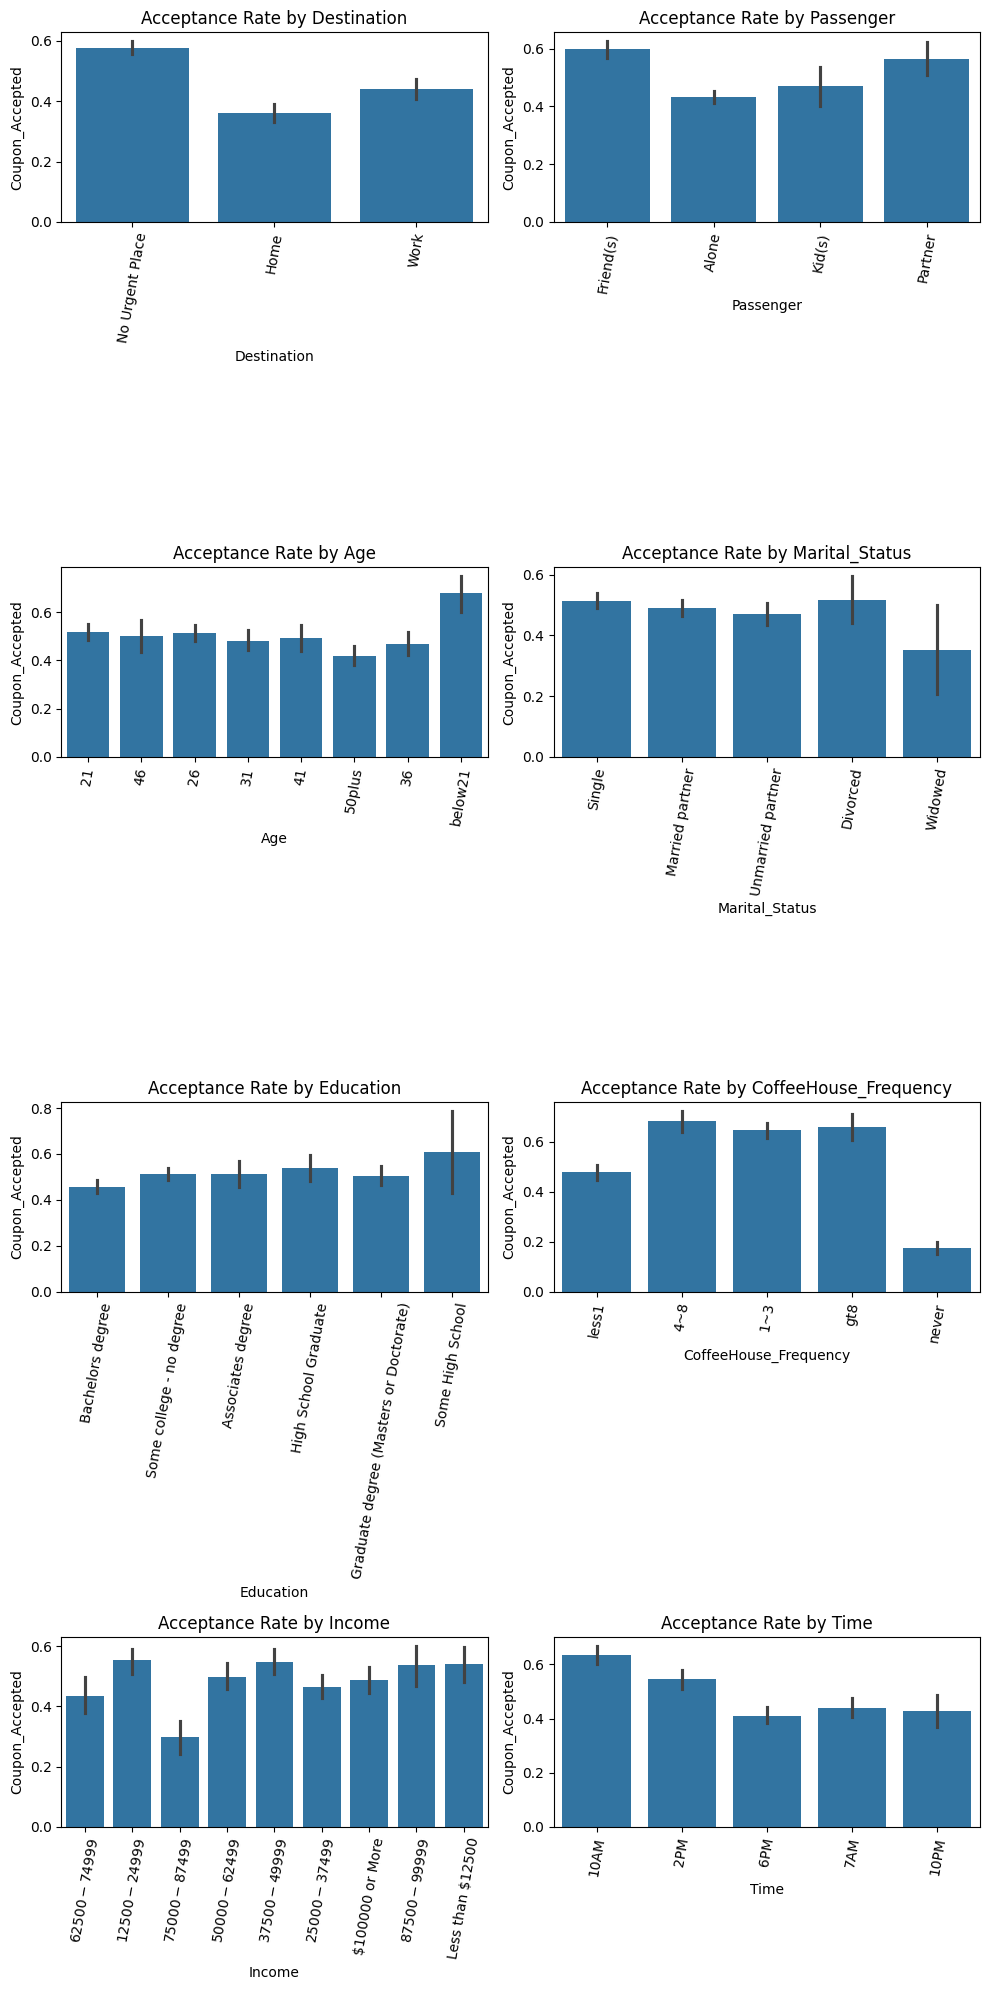

In [96]:
# Select categorical and numerical columns
categorical_cols = ['Destination', 'Passenger', 'Age', 'Marital_Status', 'Education', 'CoffeeHouse_Frequency', 'Income', 'Time']


# Create a figure and subplots for three plots in one row
fig, axes = plt.subplots(4, 2, figsize=(10, 20))  # 1 row, 3 columns

# Plot the first six categorical columns
for i, col in enumerate(categorical_cols[:8]):  # Plot the eight categorical columns
    row = i // 2  # Calculate the row index
    col_num = i % 2  # Calculate the column index
    sns.barplot(ax=axes[row, col_num], data=coffee_coupons_only, x=col, y='Coupon_Accepted')  # Bar plot for each categorical column
    axes[row, col_num].set_title(f'Acceptance Rate by {col}')    #Title formatting not carried. can be further improved
    axes[row, col_num].set_xlabel(col) #ONly xlabels used, y label dropped to avoid clutter and repitition on y axis of each subplot
    axes[row, col_num].tick_params(axis='x', rotation=80)

#axes[row, col_num].set_ylabel('Acceptance Rate')


plt.subplots_adjust(hspace=2.0)  # Give space for the x axis labels to be written. Some labels are long and ugly
plt.tight_layout()  #prevent overlapping
plt.savefig('images/Acceptance_Rates_Coffee_over_Driver_Attribute.png')
plt.show()

#**Following drivers are more likely to accept the coffee coupons.**
- Destination : Not urgent place
- Company : Friends or Partner
- Age : Drivers with age below 21
- Education : Some high school
- Coffee house visit frequency : high
- Time : 10 AM

#**Income seems to have no linear effect on acceptance rate of coffee coupons**

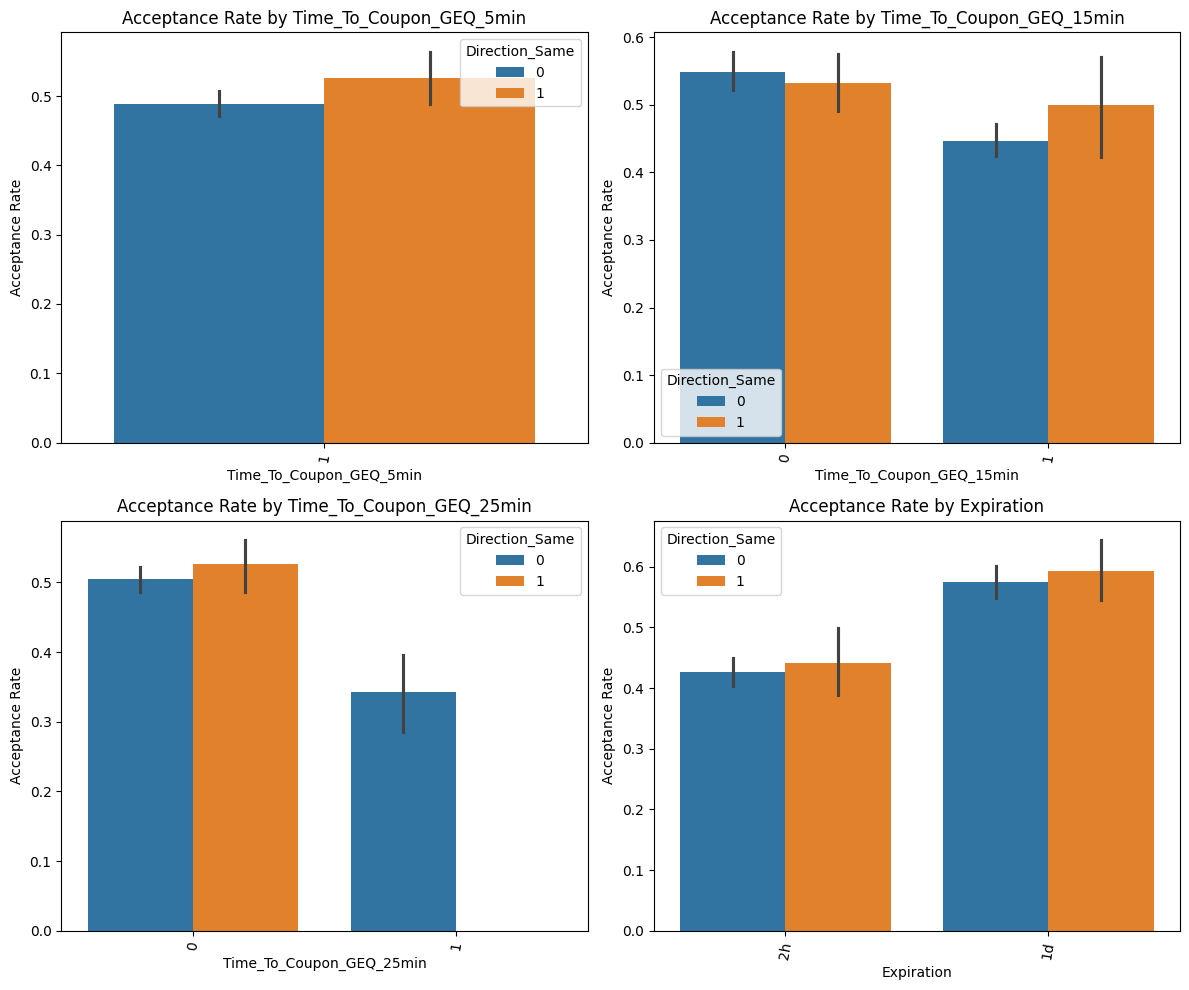

In [97]:
# Select columns
categorical_cols_coupon_attributes = ['Time_To_Coupon_GEQ_5min','Time_To_Coupon_GEQ_15min','Time_To_Coupon_GEQ_25min', 'Expiration'] #Direction_opposite is redundant


# Create a figure and subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))  # 2 rows, 2 columns


# Plot the categorical columns
for i, col in enumerate(categorical_cols_coupon_attributes[:4]):  # Plot the four categorical columns
    row = i // 2  # Calculate the row index
    col_num = i % 2  # Calculate the column index
    sns.barplot(ax=axes[row, col_num], data=coffee_coupons_only, x=col, y='Coupon_Accepted', hue='Direction_Same')   # Bar plot for each categorical column
    axes[row, col_num].set_title(f'Acceptance Rate by {col}')    #Title of each sub plot
    axes[row, col_num].set_xlabel(col)
    axes[row, col_num].set_ylabel('Acceptance Rate')
    axes[row, col_num].tick_params(axis='x', rotation=80)

plt.subplots_adjust(hspace=2.0)  # Give space for the x axis labels to be written. Some labels are long and ugly
plt.tight_layout()  #prevent overlapping
plt.savefig('images/Acceptance_Rates_Coffee_over_Coupon_Attributes.png')
plt.show()

**Following is the impact of the distance, direction and lifetime of the coupon on driver's coupon acceptance behaviour.**
- All coupons are 5 mins away from the driver as seen by the value only 1 for 'Time_To_Coupon_GEQ_5min' in the plot and mean value 1 with zero std deviation.
- When direction of the coupon venue and the driver's driving direction are in same direction, coupons are more likely to be accepted.
- In second plot, when the direction is same and distnace is less than 15min then coupons are more likely to be accepted.
- In third plot, the value drops when the detour addition is more than 25 min and in opposite direction.
- Longer life of coupon raises the chance of acceptance of the coupon.

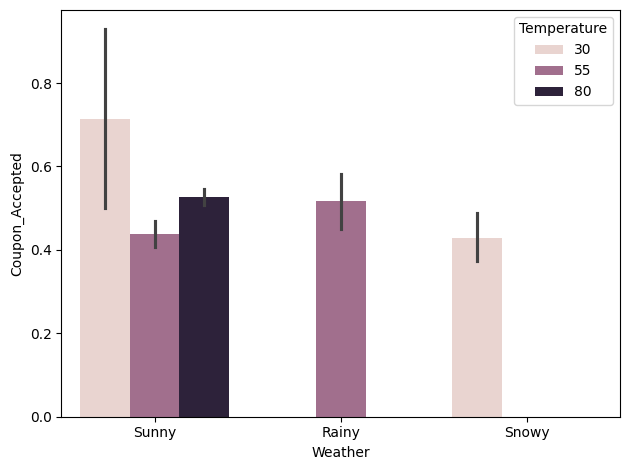

In [98]:
# Create a figure
sns.barplot(data=coffee_coupons_only, x='Weather', y='Coupon_Accepted', hue='Temperature')   # Bar plot for each categorical column
plt.tight_layout()  #prevent overlapping
plt.savefig('images/Acceptance_Rates_Coffee_over_Weather_Attributes.png')
plt.show()

#**CoffeeHouse coupons are more likely to be accepted when the weather is sunny and temperature is low OR when the weather is rainy**

In [99]:
# Find proportions based on combinations of two columns- gender and destination and groups within
coffee_coupon_acceptance_by_gender_destination = coffee_coupons_only.groupby(['Gender', 'Destination'])['Coupon_Accepted'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(coffee_coupon_acceptance_by_gender_destination.sort_values(by="Coupon_Accepted", ascending=False))

   Gender      Destination  Coupon_Accepted
1  Female  No Urgent Place         0.587226
4    Male  No Urgent Place         0.566567
5    Male             Work         0.456311
2  Female             Work         0.425486
3    Male             Home         0.393519
0  Female             Home         0.332599


In [100]:
# Find proportions based on combinations of two columns- passenger and gender and groups within
coffee_coupon_acceptance_by_gender_passenger = coffee_coupons_only.groupby(['Passenger', 'Gender'])['Coupon_Accepted'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(coffee_coupon_acceptance_by_gender_passenger.sort_values(by="Coupon_Accepted", ascending=False))

   Passenger  Gender  Coupon_Accepted
2  Friend(s)  Female         0.615385
3  Friend(s)    Male         0.577391
6    Partner  Female         0.575342
7    Partner    Male         0.555556
4     Kid(s)  Female         0.478632
1      Alone    Male         0.455672
5     Kid(s)    Male         0.453333
0      Alone  Female         0.412670


In [101]:
# Find proportions based on combinations of two columns- gender and marital status and groups within
coffee_coupon_acceptance_by_gender_Marital_Status = coffee_coupons_only.groupby(['Gender', 'Marital_Status'])['Coupon_Accepted'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(coffee_coupon_acceptance_by_gender_Marital_Status.sort_values(by="Coupon_Accepted", ascending=False))

   Gender     Marital_Status  Coupon_Accepted
5    Male           Divorced         0.600000
7    Male             Single         0.539016
3  Female  Unmarried partner         0.506667
0  Female           Divorced         0.495575
6    Male    Married partner         0.489426
1  Female    Married partner         0.489335
2  Female             Single         0.483434
8    Male  Unmarried partner         0.425249
4  Female            Widowed         0.411765
9    Male            Widowed         0.294118


In [102]:
# Find proportions based on age group only
coffee_coupon_acceptance_by_age = coffee_coupons_only.groupby(['Age'])['Coupon_Accepted'].mean().reset_index()

#Output the proportions in descending order to find highest and lowest values
print(coffee_coupon_acceptance_by_age.sort_values(by="Coupon_Accepted", ascending=False))

       Age  Coupon_Accepted
7  below21         0.678322
0       21         0.517773
1       26         0.513174
5       46         0.502347
4       41         0.492114
2       31         0.481164
3       36         0.468586
6   50plus         0.419660


#**Hypothesis on Coffee Coupons**

- Younger drivers tend to accept coffee coupons more.
- Females tend to accept coffee coupons with friends and partners.
- Both genders have higher tendency to accept the coupons when not heading to any urgent place like _work_
- 10 AM seems to be best time for offering coffee coupons.
- Low temperature sunny weather tends to increase CoffeeHouse coupon acceptance.
- Increase in Distance from coupon venue leads to decrease in acceptance.
- Longer life coupons are accepted more than shorter life.
- Same direction of travel marginally increase the chances of acceptance.  
